# How to use


## Import

Let us first import all the necessary for this tutorial:

In [35]:
from Trajectory import MidTrajectory 
from ComputeVelocities import compute_velocities

- **Trajectory** contains the classes and the methods that compute the path the car should follow during the race. MidTrajectory is, for now, the only implemented algorithm.
- **ComputeVelocities** contains the functions to compute, given a path, the velocities the car should reach.

In [36]:
from GraphicUtility import plot_track_map, plot_trajectory, end_plotting
from Utils import euclidean_distance_no_sqrt, serialize_to_file

* **GraphicsUtility** contains methods to visualize the track or the trajectory in a scatter plot.
* **Utils** contains several methods such as the euclidean distance or the computation of the spline.

In [37]:
from TrackMap import TrackMap

* **TrackMap** contains the class that represents a track map.

In [38]:
from ROSInterface import trajectory_to_ros

* **trajectory_to_ros** is used to transform the internal representation of a trajectory into something we can send through a ROS message.

## Load the Track

To load the track we will utilize the ```load_track``` function provided by the ```TrackMap``` class. This method will load a track from a JSON file. You can create your own track by using our tool for the generation of tracks (see readme in create_custom_track). Our tracks are saved in ```./tests/tracks```. For the example, we will use the TarascoRace track.

In [39]:
trackMap = TrackMap()
trackMap.load_track('./tests/tracks/TarascoRace.json')

## Compute the Trajectory

To compute the path, we will create a ```MidTrajectory``` object and then use its ```compute_trajectory``` method to obtain a list of ```PlanStep```. Each ```PlanStep``` contains the position and the expected velocity in that position. However, notice that compute_trajectory will output only PlanStep with velocities equal to zero. Below, we show an example of Plan Step.

In [40]:
#create MidTrajectory object
trajectory = MidTrajectory(distance=euclidean_distance_no_sqrt)
#compute the trajectory
trajectory.compute_trajectory(trackMap)
#print the first plan step
print(trajectory.get_trajectory()[0])

PlanStep(position=(225.304, 306.768), velocity=0, velocity_vector=[])


Eventually, we compute the velocities using the ```compute_velocities``` method:

In [41]:
%%capture
trajectory.set_trajectory(compute_velocities(trajectory.get_trajectory()))

As you can read, now the velocity is not zero anymore:

In [42]:
#print the first plan step
print(trajectory.get_trajectory()[0])

PlanStep(position=(225.304, 306.768), velocity=20, velocity_vector=(-0.5403432269583196, -19.99269939745707))


The trajectory can be transformed into something acceptable by ROS using ```trajetory_to_ros```:

In [43]:
from typing import List, Tuple
#ros_trajectory type
ros_trajectory : Tuple[List[float], List[float], List[float], List[float]] = ()
ros_trajectory = trajectory_to_ros(trajectory)

The ros_trajectory is a tuple that contains four lists:
* the positions of the path along the x-axis
* the locations of the path along the y-axis
* the x component of the velocity vector
* the y component of the velocity vector.

## Plot the plan and the track

Using the methods defined in ```GraphicsUtility``` we can visualize the track and the plan: 

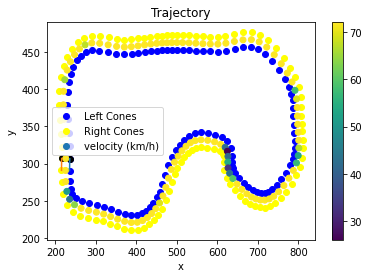

In [44]:
plot_track_map(trackMap, new_figure=True)
plot_trajectory(trajectory.get_trajectory(), new_figure=False)
end_plotting()